# K Nearest Neighbors - Encrypted Data Project 

In this notebook we will work with a set of classified data from a company. They hid the parameter column, but gave the target class and data.

We will use KNN to create a model that can directly predict the class for a new data point based on the parameters.

## IMPORTS

In [39]:
# Import libraries for data analysis and manipulation:
import pandas as pd
import numpy as np

# Import for data visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import for standardization of variables:
from sklearn.preprocessing import StandardScaler

# Import to training-test division:
from sklearn.model_selection import train_test_split

# Import KNN:
from sklearn.neighbors import KNeighborsClassifier

# Import for confuson matrix and classification report:
from sklearn.metrics import classification_report,confusion_matrix

## LOADING DATA

In [4]:
df = pd.read_csv('KNN_Project_Data')

In [5]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.0 KB


In [7]:
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


## EXPLORATORY DATA ANALYSIS

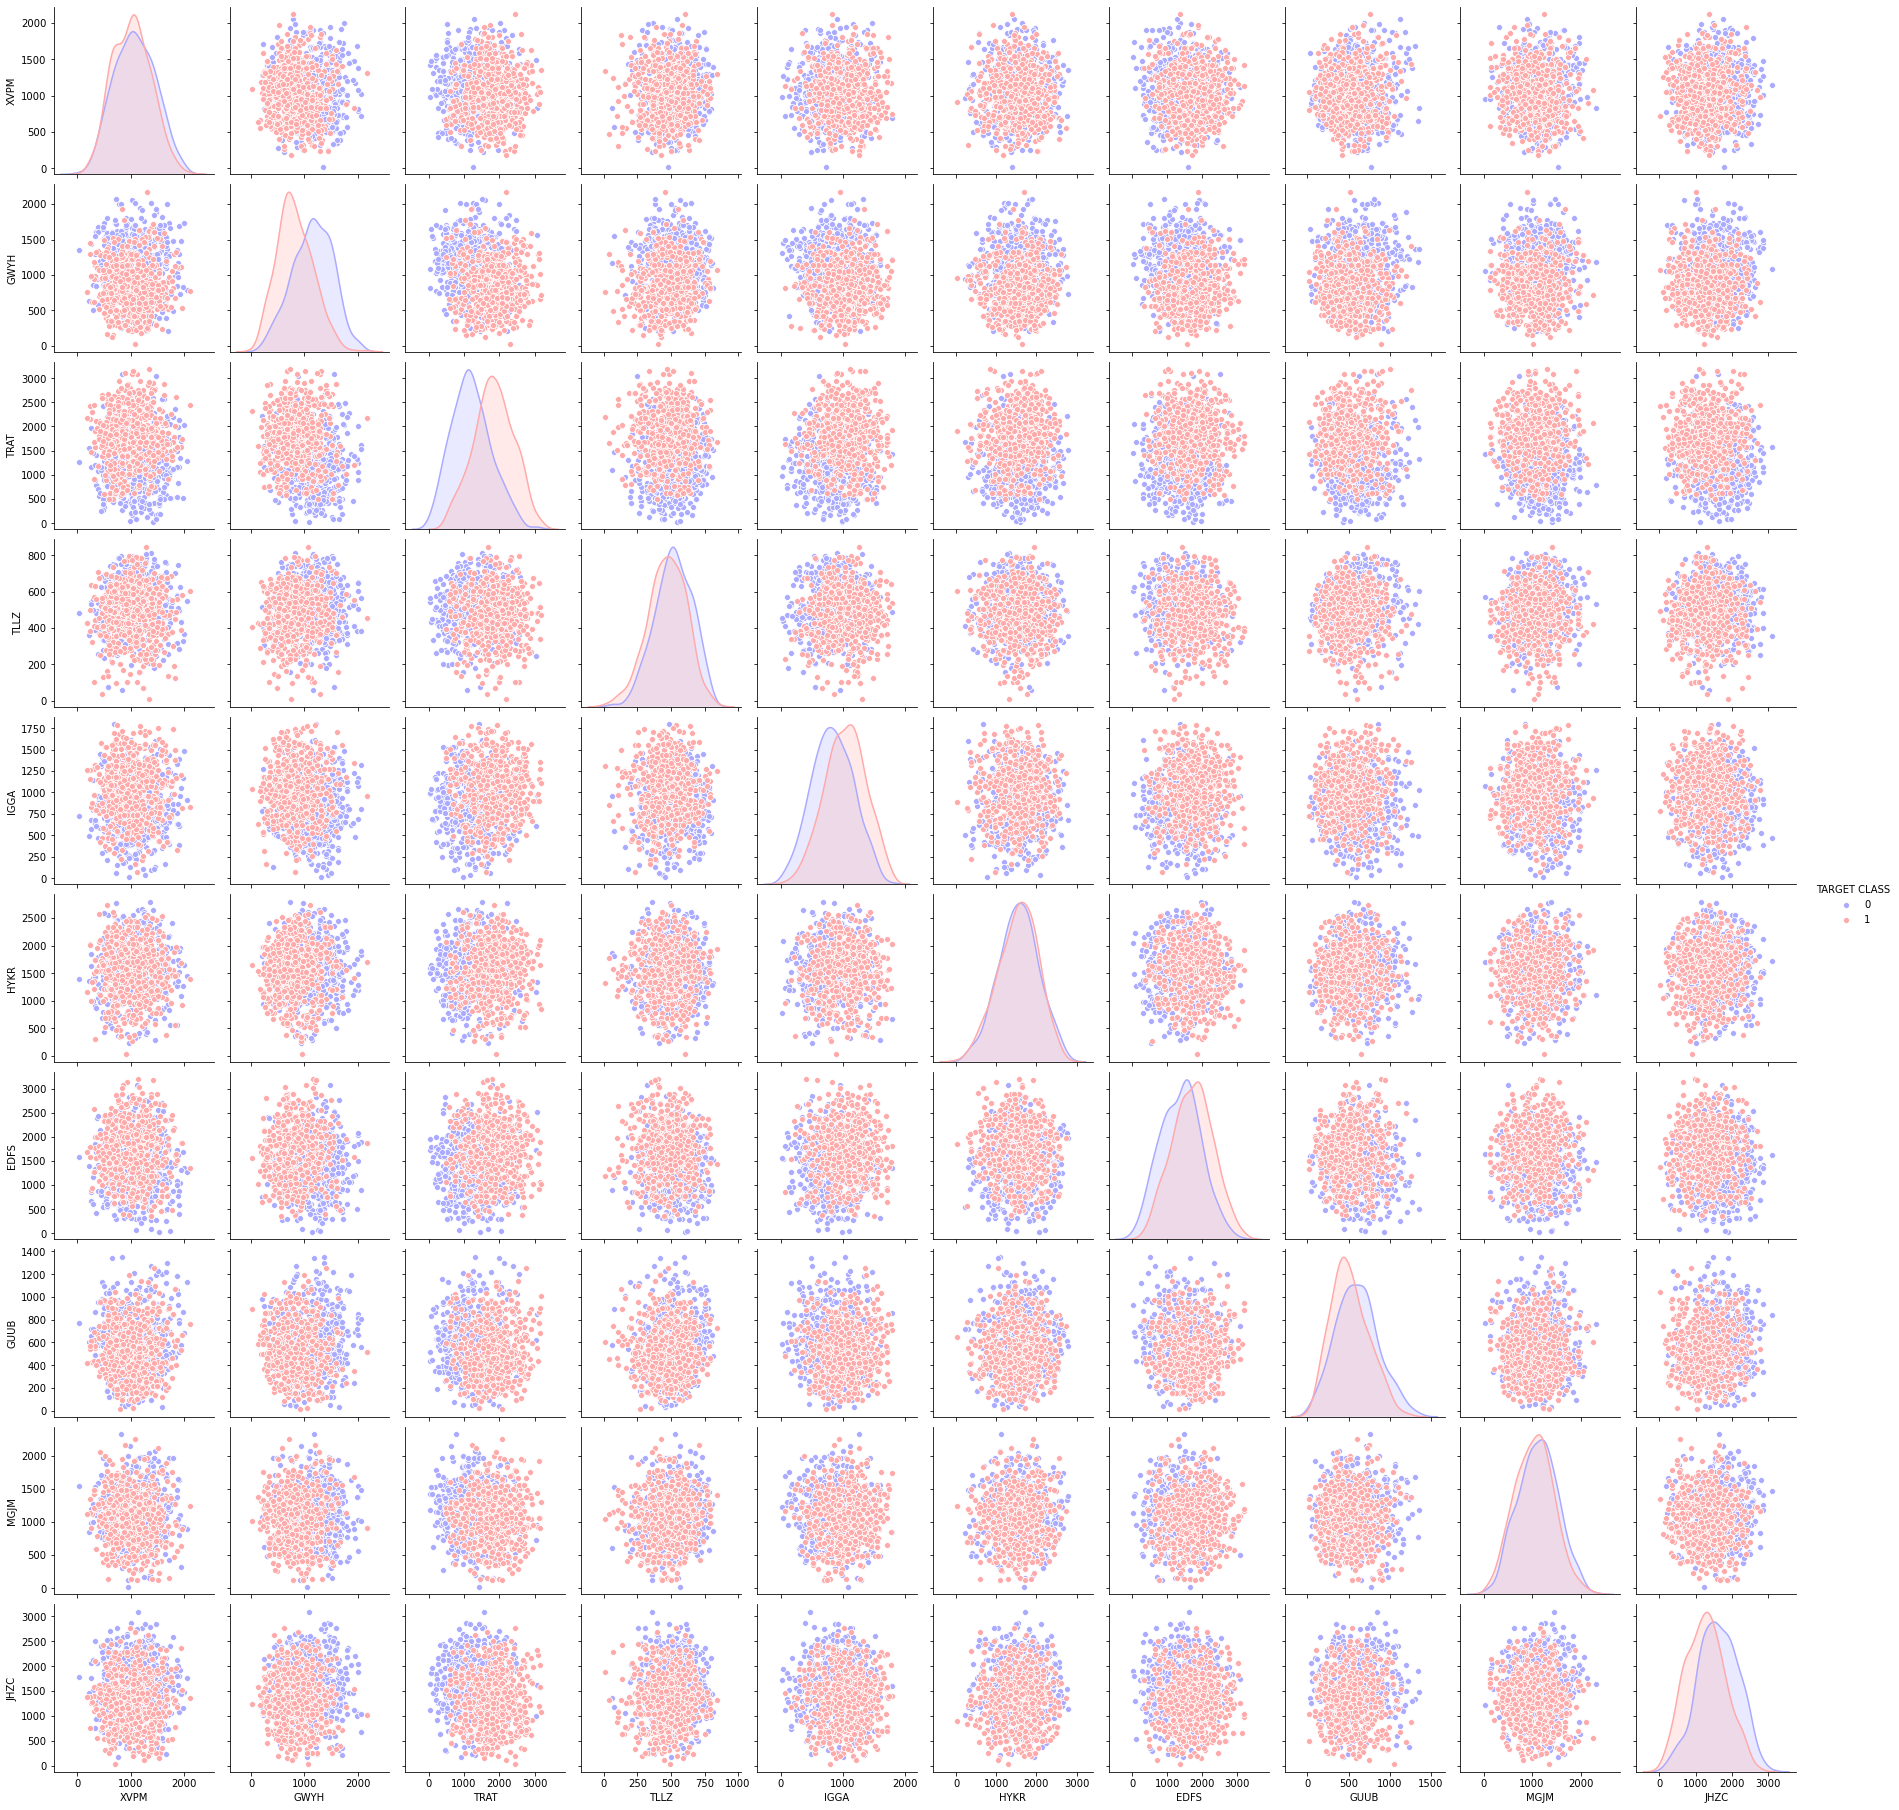

In [9]:
sns.pairplot(df, hue='TARGET CLASS', palette='bwr')

## DATA PREPARATION

### Normalize variables

Since the KNN classifier predicts the class of a given observation by identifying the closest observations, the scale of the variable is important. All variables that are on a large scale will have a much greater effect on the distance between observations and, therefore, on the KNN classifier, than variables on a small scale. Thus, to obtain a better performance we will normalize the data.

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

We will use the .transform () method to transform the parameters into a normalized version and view the result in a new DataFrame called df_feat.

In [14]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [15]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


### Training-test division

In [17]:
x_train, x_test, y_train, y_test = train_test_split( scaled_features, df['TARGET CLASS'], test_size = 0.30 )

## MODEL KNN TRAINING:

Since we are trying to find a model to predict whether someone will be in the TARGET CLASS or not, we will start with k = 1.

### Model description

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)

### Model Training

In [21]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

### Prediction

In [23]:
pred = knn.predict(x_test)

Confusion matrix and classification report:

In [25]:
print(confusion_matrix(y_test,pred))

[[111  33]
 [ 45 111]]


In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       144
           1       0.77      0.71      0.74       156

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



### K value

We will continue to use the elbow method to choose a good K value.
We will create a for loop that trains several KNN models with different k values, and then we will keep a record of error_rate for each of these models with a list. Once this is done, we will build a graph with the loop information.

In [27]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

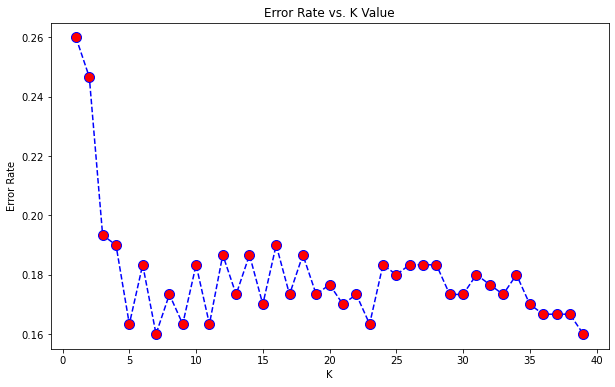

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Let's re-train the model with new good k values (based on the graph) and check the classification report.

In [36]:
# NOW WITH K=7
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=7')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=7


[[123  21]
 [ 27 129]]


              precision    recall  f1-score   support

           0       0.82      0.85      0.84       144
           1       0.86      0.83      0.84       156

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [38]:
# NOW WITH K=39
knn = KNeighborsClassifier(n_neighbors=39)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=39')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=39


[[122  22]
 [ 26 130]]


              precision    recall  f1-score   support

           0       0.82      0.85      0.84       144
           1       0.86      0.83      0.84       156

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



We concluded that we were able to extract a better performance from our model, with an accuracy of 0.84, adjusting to the K value equal to 7. There is no need to overload the program with a larger value of k.